<a href="https://colab.research.google.com/github/narsym/married-at-first-sight/blob/master/Married_at_first_sight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import data from github

 

In [0]:
url = 'https://raw.githubusercontent.com/narsym/married-at-first-sight/master/mafs.csv'

Read data with pandas

In [2]:
import pandas as pd
data = pd.read_csv(url)
data.head()

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married,1,1,1,1,0,0,0,0
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married,1,1,1,1,0,0,0,0
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced,1,1,1,1,0,0,0,0
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced,1,1,1,1,0,0,0,0
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced,1,1,1,1,0,0,0,0


Import other libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Information about the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Couple                68 non-null     int64 
 1   Season                68 non-null     int64 
 2   Location              68 non-null     object
 3   Name                  68 non-null     object
 4   Age                   68 non-null     int64 
 5   Gender                68 non-null     object
 6   Occupation            68 non-null     object
 7   Decision              68 non-null     object
 8   Status                68 non-null     object
 9   DrPepperSchwartz      68 non-null     int64 
 10  DrLoganLevkoff        68 non-null     int64 
 11  DrJosephCilona        68 non-null     int64 
 12  ChaplainGregEpstein   68 non-null     int64 
 13  PastorCalvinRoberson  68 non-null     int64 
 14  RachelDeAlto          68 non-null     int64 
 15  DrJessicaGriffin      68 non-null     int6

Separting categorical and numerical attributes

In [0]:
numd = data.select_dtypes(np.number)
catd = data.select_dtypes(object)

In [6]:
numd.head()

,Couple,Season,Age,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,27,1,1,1,1,0,0,0,0
1,1,1,31,1,1,1,1,0,0,0,0
2,2,1,26,1,1,1,1,0,0,0,0
3,2,1,27,1,1,1,1,0,0,0,0
4,3,1,33,1,1,1,1,0,0,0,0


In [7]:
catd.head()

,Location,Name,Gender,Occupation,Decision,Status
0,New York City and Northern New Jersey,Jamie Otis-Hehner,F,Nurse,Yes,Married
1,New York City and Northern New Jersey,Doug Hehner,M,Software salesman,Yes,Married
2,New York City and Northern New Jersey,Cortney Hendrix,F,Make-up artist,Yes,Divorced
3,New York City and Northern New Jersey,Jason Carrion,M,Fireman,Yes,Divorced
4,New York City and Northern New Jersey,Monet Bell,F,Product development manager,No,Divorced


encoding categorical attributes

In [0]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def encode(col):
  col_enc = oe.fit_transform(col)
  col_enc = pd.DataFrame(col_enc)
  col_enc.columns = col.columns
  return col_enc


In [0]:
catd_enc = encode(catd)

In [10]:
catd_enc.head()

,Location,Name,Gender,Occupation,Decision,Status
0,5.0,26.0,0.0,42.0,1.0,1.0
1,5.0,19.0,1.0,60.0,1.0,1.0
2,5.0,10.0,0.0,34.0,1.0,0.0
3,5.0,29.0,1.0,26.0,1.0,0.0
4,5.0,47.0,0.0,48.0,0.0,0.0


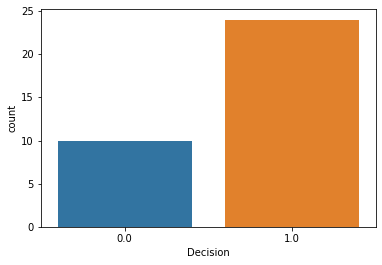

In [11]:
sns.countplot(catd_enc[catd_enc['Gender'] == 0.0].Decision)

feature selection on numerical attributes

In [0]:
newd = pd.concat([numd,catd_enc['Decision']],axis = 1)

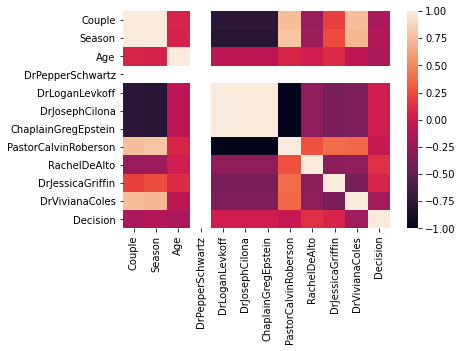

In [13]:
sns.heatmap(newd.corr())

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(numd,catd_enc['Decision'])

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [0]:
feat_importances = pd.Series(etr.feature_importances_,index = numd.columns)

In [16]:
feat_importances

Couple                  0.454210
Season                  0.109418
Age                     0.339458
DrPepperSchwartz        0.000000
DrLoganLevkoff          0.009850
DrJosephCilona          0.007862
ChaplainGregEpstein     0.010657
PastorCalvinRoberson    0.012636
RachelDeAlto            0.007478
DrJessicaGriffin        0.021157
DrVivianaColes          0.027274
dtype: float64

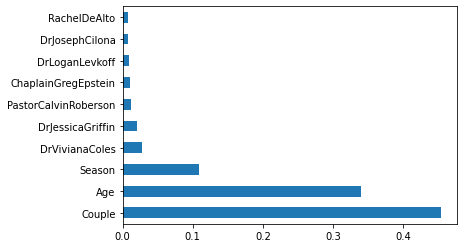

In [17]:
feat_importances.nlargest(10).plot(kind = 'barh')

In [0]:
fd = numd[['Couple','Age','Season']]

feature selection on categorical attributes

In [19]:
etr.fit(catd_enc[['Gender','Occupation','Status']],catd_enc['Decision'])

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

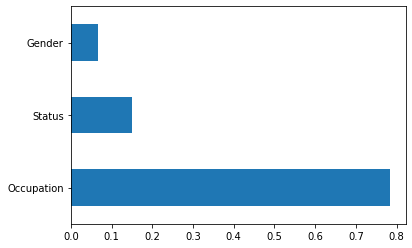

In [20]:
feat_importances = pd.Series(etr.feature_importances_,index = ['Gender','Occupation','Status'])
feat_importances.nlargest(10).plot(kind = 'barh')

In [0]:
fd = pd.concat([fd,catd_enc[['Occupation','Status']]],axis = 1)

In [24]:
fd.head()

,Couple,Age,Season,Occupation,Occupation,Status
0,1,27,1,42.0,42.0,1.0
1,1,31,1,60.0,60.0,1.0
2,2,26,1,34.0,34.0,0.0
3,2,27,1,26.0,26.0,0.0
4,3,33,1,48.0,48.0,0.0


train test split

In [0]:
from sklearn.model_selection import train_test_split
X = fd
y = catd_enc['Decision']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

applying LinearSVC

In [35]:
from sklearn.svm import LinearSVC
lr = LinearSVC(max_iter = 100000, C = 0.1,tol = 0.1)
lr.fit(X_train,y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.1,
          verbose=0)

In [36]:
lr.score(X_train,y_train)

0.803921568627451

In [37]:
lr.score(X_test,y_test)

0.7647058823529411

WE got 76% accuracy with so less data.